---

_You are currently looking at **version 1.1** of this notebook. To download notebooks and datafiles, as well as get help on Jupyter notebooks in the Coursera platform, visit the [Jupyter Notebook FAQ](https://www.coursera.org/learn/python-social-network-analysis/resources/yPcBs) course resource._

---

# Assignment 1 - Creating and Manipulating Graphs

Eight employees at a small company were asked to choose 3 movies that they would most enjoy watching for the upcoming company movie night. These choices are stored in the file `Employee_Movie_Choices.txt`.

A second file, `Employee_Relationships.txt`, has data on the relationships between different coworkers. 

The relationship score has value of `-100` (Enemies) to `+100` (Best Friends). A value of zero means the two employees haven't interacted or are indifferent.

Both files are tab delimited.

In [84]:
import networkx as nx
import pandas as pd
import numpy as np
from networkx.algorithms import bipartite


# This is the set of employees
employees = set(['Pablo',
                 'Lee',
                 'Georgia',
                 'Vincent',
                 'Andy',
                 'Frida',
                 'Joan',
                 'Claude'])

# This is the set of movies
movies = set(['The Shawshank Redemption',
              'Forrest Gump',
              'The Matrix',
              'Anaconda',
              'The Social Network',
              'The Godfather',
              'Monty Python and the Holy Grail',
              'Snakes on a Plane',
              'Kung Fu Panda',
              'The Dark Knight',
              'Mean Girls'])


# you can use the following function to plot graphs
# make sure to comment it out before submitting to the autograder
def plot_graph(G, weight_name=None):
    '''
    G: a networkx G
    weight_name: name of the attribute for plotting edge weights (if G is weighted)
    '''
    %matplotlib notebook
    import matplotlib.pyplot as plt
    
    plt.figure()
    pos = nx.spring_layout(G)
    edges = G.edges()
    weights = None
    
    if weight_name:
        weights = [int(G[u][v][weight_name]) for u,v in edges]
        labels = nx.get_edge_attributes(G,weight_name)
        nx.draw_networkx_edge_labels(G,pos,edge_labels=labels)
        nx.draw_networkx(G, pos, edges=edges, width=weights);
    else:
        nx.draw_networkx(G, pos, edges=edges);

### Question 1

Using NetworkX, load in the bipartite graph from `Employee_Movie_Choices.txt` and return that graph.

*This function should return a networkx graph with 19 nodes and 24 edges*

In [85]:
def answer_one():
    df = pd.read_csv("Employee_Movie_Choices.txt", sep="\t")

    G = nx.Graph()

    G.add_nodes_from(df['#Employee'], bipartite=0)
    G.add_nodes_from(df['Movie'], bipartite=1)
    G.add_edges_from(list(tuple(zip(df['#Employee'].tolist(), df['Movie'].tolist()))))

    return G

<IPython.core.display.Javascript object>


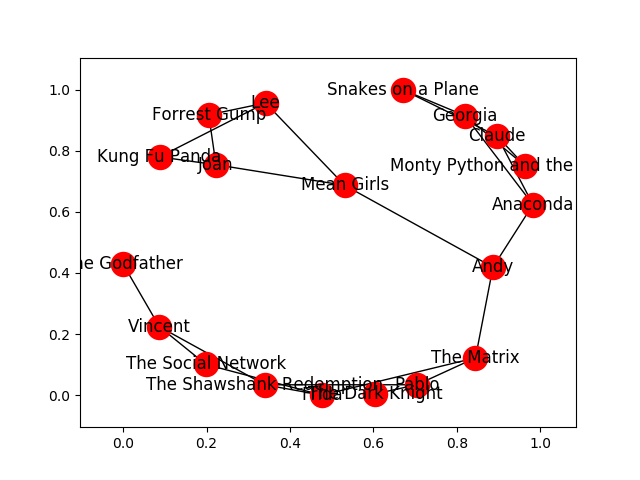

In [89]:
nx.draw_networkx(answer_two(), )

### Question 2

Using the graph from the previous question, add nodes attributes named `'type'` where movies have the value `'movie'` and employees have the value `'employee'` and return that graph.

*This function should return a networkx graph with node attributes `{'type': 'movie'}` or `{'type': 'employee'}`*

In [3]:
def answer_two():
    df = pd.read_csv("Employee_Movie_Choices.txt", sep="\t")

    G = nx.Graph()

    G.add_nodes_from(df['#Employee'], bipartite=0, type="employee")
    G.add_nodes_from(df['Movie'], bipartite=1, type="movie")
    G.add_edges_from(list(tuple(zip(df['#Employee'].tolist(), df['Movie'].tolist()))))

    return G

### Question 3

Find a weighted projection of the graph from `answer_two` which tells us how many movies different pairs of employees have in common.

*This function should return a weighted projected graph.*

In [4]:
def answer_three():
    df = pd.read_csv("Employee_Movie_Choices.txt", sep="\t")

    G = nx.Graph()

    G.add_nodes_from(df['#Employee'], bipartite=0, type="employee")
    G.add_nodes_from(df['Movie'], bipartite=1, type="movie")
    G.add_edges_from(list(tuple(zip(df['#Employee'].tolist(), df['Movie'].tolist()))))

    proj = bipartite.weighted_projected_graph(G, employees)
        
    
    return proj

### Question 4

Suppose you'd like to find out if people that have a high relationship score also like the same types of movies.

Find the Pearson correlation ( using `DataFrame.corr()` ) between employee relationship scores and the number of movies they have in common. If two employees have no movies in common it should be treated as a 0, not a missing value, and should be included in the correlation calculation.

*This function should return a float.*

In [75]:
def answer_four():
    df = pd.read_csv("Employee_Movie_Choices.txt", sep="\t")

    G = nx.Graph()

    G.add_nodes_from(df['#Employee'], bipartite=0, type="employee")
    G.add_nodes_from(df['Movie'], bipartite=1, type="movie")
    G.add_edges_from(list(tuple(zip(df['#Employee'].tolist(), df['Movie'].tolist()))))

    proj = bipartite.weighted_projected_graph(G, employees)

    w = pd.DataFrame(proj.edges(data=True))

    w.columns = ['name1', 'name2', 'w']

    w['weight'] = w['w'].apply(lambda x: x['weight'])
    w['movie_pair'] = w.apply(lambda row: tuple([row['name1'], row['name2']]) , axis=1)

    rel = pd.read_csv("Employee_Relationships.txt", sep="\t", names=['name1', 'name2', 'score'] )

    rel['rel_pair'] = rel.apply(lambda row: tuple([row['name1'], row['name2']]) , axis=1)

    def check(row):
        mask = w.movie_pair.apply(lambda x: (row['rel_pair'][0] in x) and (row['rel_pair'][1] in x))
        val = w.loc[mask, 'weight']
        if len(val) > 0:
            return val.values[0]
        else:
            return 0

    rel['weight'] = 0
    rel['weight']  = rel.apply(check, axis=1)

    res = rel.corr()

    return res.loc['weight', 'score']
